# Imágenes como conjuntos de datos

Las imágenes son un tipo de datos fundamental para un cientifíco de datos que resuelve tareas de visión por computador. A diferencia de otro tipo de datos las imágenes son multidimensionales y contienen información enriquecida además de unicamente su tamaño (alto x ancho). Cada pixel contiene tambiéén la información de su intensidad, de modo que un objeto tipo imagen tiene un tamaño (alto,ancho) y por cada coordenada un valor de intensidad en una escala de 0 a 1. 

![](https://drive.google.com/uc?id=1-CFgFy0f6Mkb0496sb4MgR60SoCX-F9_)


Por otro lado las imágenes a color tienen 3 canales diferentes (asociado a las escalas RGB - Rojo, Verde y azul), de modo que el tamaño de un objeto tipo imagen a color es (alto, ancho, canales) donde cada pixel contiene la información de intensidad en las escalas rojo, azul y verde. Esta escala varía entre 0 y 255 a diferencia de la escala de grises.


![](https://drive.google.com/uc?id=18Txu65iVgA08Gq7xjLxZp8s3A3N1GnEp)


Algunas imágenes continen un cuarto canal asociado al brillo de cada pixel, en este caso en nemero de canales es 4 y se les reconoce como las escalas RGBA.



# Ejercicio

En este notebook identificaremos uno de los errores más comúnes al momento de entrenar modelos de aprendizaje; el cruce de datos de entrenamiento y evaluación. 

Para identificar este error visualizaremos curvas de *loss*, *f1_score* y *accuracy*.

## Leer los datos tipo imágenes

In [1]:
#-- Descomprimimos el dataset
# !rm -r mnist
!unzip mnist.zip

Archive:  mnist.zip
   creating: mnist/
   creating: mnist/test/
   creating: mnist/test/0/
  inflating: mnist/test/0/10.png     
  inflating: mnist/test/0/1001.png   
  inflating: mnist/test/0/1009.png   
  inflating: mnist/test/0/101.png    
  inflating: mnist/test/0/1034.png   
  inflating: mnist/test/0/1047.png   
  inflating: mnist/test/0/1061.png   
  inflating: mnist/test/0/1084.png   
  inflating: mnist/test/0/1094.png   
  inflating: mnist/test/0/1121.png   
  inflating: mnist/test/0/1148.png   
  inflating: mnist/test/0/1154.png   
  inflating: mnist/test/0/1176.png   
  inflating: mnist/test/0/1188.png   
  inflating: mnist/test/0/1191.png   
  inflating: mnist/test/0/1195.png   
  inflating: mnist/test/0/1197.png   
  inflating: mnist/test/0/126.png    
  inflating: mnist/test/0/13.png     
  inflating: mnist/test/0/136.png    
  inflating: mnist/test/0/148.png    
  inflating: mnist/test/0/157.png    
  inflating: mnist/test/0/183.png    
  inflating: mnist/test/0/188.png 

  inflating: mnist/test/2/280.png    
  inflating: mnist/test/2/285.png    
  inflating: mnist/test/2/291.png    
  inflating: mnist/test/2/293.png    
  inflating: mnist/test/2/298.png    
  inflating: mnist/test/2/303.png    
  inflating: mnist/test/2/306.png    
  inflating: mnist/test/2/318.png    
  inflating: mnist/test/2/321.png    
  inflating: mnist/test/2/326.png    
  inflating: mnist/test/2/331.png    
  inflating: mnist/test/2/35.png     
  inflating: mnist/test/2/362.png    
  inflating: mnist/test/2/363.png    
  inflating: mnist/test/2/371.png    
  inflating: mnist/test/2/38.png     
  inflating: mnist/test/2/387.png    
  inflating: mnist/test/2/390.png    
  inflating: mnist/test/2/400.png    
  inflating: mnist/test/2/404.png    
  inflating: mnist/test/2/418.png    
  inflating: mnist/test/2/421.png    
  inflating: mnist/test/2/423.png    
  inflating: mnist/test/2/444.png    
  inflating: mnist/test/2/452.png    
  inflating: mnist/test/2/456.png    
  inflating:

  inflating: mnist/test/4/9672.png   
  inflating: mnist/test/4/9683.png   
  inflating: mnist/test/4/9708.png   
  inflating: mnist/test/4/9718.png   
  inflating: mnist/test/4/9728.png   
  inflating: mnist/test/4/9735.png   
  inflating: mnist/test/4/9738.png   
  inflating: mnist/test/4/9745.png   
  inflating: mnist/test/4/9764.png   
  inflating: mnist/test/4/9766.png   
  inflating: mnist/test/4/9783.png   
  inflating: mnist/test/4/9789.png   
  inflating: mnist/test/4/9792.png   
  inflating: mnist/test/4/9805.png   
  inflating: mnist/test/4/9813.png   
  inflating: mnist/test/4/9822.png   
  inflating: mnist/test/4/9835.png   
  inflating: mnist/test/4/9861.png   
  inflating: mnist/test/4/9866.png   
  inflating: mnist/test/4/9871.png   
  inflating: mnist/test/4/9873.png   
  inflating: mnist/test/4/9906.png   
  inflating: mnist/test/4/9915.png   
  inflating: mnist/test/4/9922.png   
  inflating: mnist/test/4/9927.png   
  inflating: mnist/test/4/9928.png   
  inflating:

  inflating: mnist/test/8/9934.png   
  inflating: mnist/test/8/9936.png   
  inflating: mnist/test/8/9959.png   
  inflating: mnist/test/8/9967.png   
  inflating: mnist/test/8/9991.png   
   creating: mnist/test/9/
  inflating: mnist/test/9/8928.png   
  inflating: mnist/test/9/8933.png   
  inflating: mnist/test/9/8935.png   
  inflating: mnist/test/9/8949.png   
  inflating: mnist/test/9/8953.png   
  inflating: mnist/test/9/8955.png   
  inflating: mnist/test/9/8962.png   
  inflating: mnist/test/9/8977.png   
  inflating: mnist/test/9/8994.png   
  inflating: mnist/test/9/8998.png   
  inflating: mnist/test/9/9023.png   
  inflating: mnist/test/9/9026.png   
  inflating: mnist/test/9/9028.png   
  inflating: mnist/test/9/9054.png   
  inflating: mnist/test/9/9057.png   
  inflating: mnist/test/9/9069.png   
  inflating: mnist/test/9/9079.png   
  inflating: mnist/test/9/9089.png   
  inflating: mnist/test/9/9093.png   
  inflating: mnist/test/9/9094.png   
  inflating: mnist/test

  inflating: mnist/train/0/5133.png  
  inflating: mnist/train/0/5187.png  
  inflating: mnist/train/0/5202.png  
  inflating: mnist/train/0/5203.png  
  inflating: mnist/train/0/5249.png  
  inflating: mnist/train/0/5319.png  
  inflating: mnist/train/0/5462.png  
  inflating: mnist/train/0/5470.png  
  inflating: mnist/train/0/5502.png  
  inflating: mnist/train/0/5525.png  
  inflating: mnist/train/0/5604.png  
  inflating: mnist/train/0/5622.png  
  inflating: mnist/train/0/5698.png  
  inflating: mnist/train/0/5809.png  
  inflating: mnist/train/0/6023.png  
  inflating: mnist/train/0/6045.png  
  inflating: mnist/train/0/6103.png  
  inflating: mnist/train/0/6117.png  
  inflating: mnist/train/0/6137.png  
  inflating: mnist/train/0/6227.png  
  inflating: mnist/train/0/6302.png  
  inflating: mnist/train/0/6337.png  
  inflating: mnist/train/0/6341.png  
  inflating: mnist/train/0/6422.png  
  inflating: mnist/train/0/6444.png  
  inflating: mnist/train/0/6629.png  
  inflating:

  inflating: mnist/train/0/5488.png  
  inflating: mnist/train/0/5512.png  
  inflating: mnist/train/0/5560.png  
  inflating: mnist/train/0/5612.png  
  inflating: mnist/train/0/5665.png  
  inflating: mnist/train/0/5690.png  
  inflating: mnist/train/0/5694.png  
  inflating: mnist/train/0/5711.png  
  inflating: mnist/train/0/5729.png  
  inflating: mnist/train/0/5844.png  
  inflating: mnist/train/0/5888.png  
  inflating: mnist/train/0/5927.png  
  inflating: mnist/train/0/5929.png  
  inflating: mnist/train/0/5932.png  
  inflating: mnist/train/0/5961.png  
  inflating: mnist/train/0/6001.png  
  inflating: mnist/train/0/6008.png  
  inflating: mnist/train/0/6065.png  
  inflating: mnist/train/0/6279.png  
  inflating: mnist/train/0/6325.png  
  inflating: mnist/train/0/6326.png  
  inflating: mnist/train/0/6331.png  
  inflating: mnist/train/0/6441.png  
  inflating: mnist/train/0/6468.png  
  inflating: mnist/train/0/6614.png  
  inflating: mnist/train/0/6823.png  
  inflating:

  inflating: mnist/train/1/7057.png  
  inflating: mnist/train/1/7078.png  
  inflating: mnist/train/1/7131.png  
  inflating: mnist/train/1/7138.png  
  inflating: mnist/train/1/7160.png  
  inflating: mnist/train/1/7175.png  
  inflating: mnist/train/1/7185.png  
  inflating: mnist/train/1/7240.png  
  inflating: mnist/train/1/7393.png  
  inflating: mnist/train/1/7472.png  
  inflating: mnist/train/1/7491.png  
  inflating: mnist/train/1/7532.png  
  inflating: mnist/train/1/7542.png  
  inflating: mnist/train/1/7658.png  
  inflating: mnist/train/1/7689.png  
  inflating: mnist/train/1/7696.png  
  inflating: mnist/train/1/7788.png  
  inflating: mnist/train/1/7789.png  
  inflating: mnist/train/1/7831.png  
  inflating: mnist/train/1/7834.png  
  inflating: mnist/train/1/7921.png  
  inflating: mnist/train/1/2731.png  
  inflating: mnist/train/1/2776.png  
  inflating: mnist/train/1/2784.png  
  inflating: mnist/train/1/2791.png  
  inflating: mnist/train/1/2920.png  
  inflating:

  inflating: mnist/train/1/5731.png  
  inflating: mnist/train/1/5749.png  
  inflating: mnist/train/1/5779.png  
  inflating: mnist/train/1/5789.png  
  inflating: mnist/train/1/5824.png  
  inflating: mnist/train/1/5903.png  
  inflating: mnist/train/1/5933.png  
  inflating: mnist/train/1/5966.png  
  inflating: mnist/train/1/6002.png  
  inflating: mnist/train/1/6052.png  
  inflating: mnist/train/1/6142.png  
  inflating: mnist/train/1/6183.png  
  inflating: mnist/train/1/6192.png  
  inflating: mnist/train/1/6206.png  
  inflating: mnist/train/1/6208.png  
  inflating: mnist/train/1/6247.png  
  inflating: mnist/train/1/6277.png  
  inflating: mnist/train/1/6499.png  
  inflating: mnist/train/1/6575.png  
  inflating: mnist/train/1/6665.png  
  inflating: mnist/train/1/6682.png  
  inflating: mnist/train/1/6718.png  
  inflating: mnist/train/1/6748.png  
  inflating: mnist/train/1/6785.png  
  inflating: mnist/train/1/6885.png  
  inflating: mnist/train/1/6925.png  
  inflating:

  inflating: mnist/train/2/4709.png  
  inflating: mnist/train/2/4710.png  
  inflating: mnist/train/2/4713.png  
  inflating: mnist/train/2/4716.png  
  inflating: mnist/train/2/4723.png  
  inflating: mnist/train/2/4725.png  
  inflating: mnist/train/2/4734.png  
  inflating: mnist/train/2/4775.png  
  inflating: mnist/train/2/4801.png  
  inflating: mnist/train/2/4805.png  
  inflating: mnist/train/2/4812.png  
  inflating: mnist/train/2/4816.png  
  inflating: mnist/train/2/4848.png  
  inflating: mnist/train/2/4870.png  
  inflating: mnist/train/2/4876.png  
  inflating: mnist/train/2/4878.png  
  inflating: mnist/train/2/4889.png  
  inflating: mnist/train/2/4899.png  
  inflating: mnist/train/2/4905.png  
  inflating: mnist/train/2/4920.png  
  inflating: mnist/train/2/4939.png  
  inflating: mnist/train/2/4941.png  
  inflating: mnist/train/2/4943.png  
  inflating: mnist/train/2/4944.png  
  inflating: mnist/train/2/4950.png  
  inflating: mnist/train/2/4954.png  
  inflating:

  inflating: mnist/train/2/6828.png  
  inflating: mnist/train/2/6831.png  
  inflating: mnist/train/2/6836.png  
  inflating: mnist/train/2/6844.png  
  inflating: mnist/train/2/6849.png  
  inflating: mnist/train/2/6878.png  
  inflating: mnist/train/2/6885.png  
  inflating: mnist/train/2/6906.png  
  inflating: mnist/train/2/6912.png  
  inflating: mnist/train/2/6920.png  
  inflating: mnist/train/2/6929.png  
  inflating: mnist/train/2/6939.png  
  inflating: mnist/train/2/6949.png  
  inflating: mnist/train/2/6989.png  
  inflating: mnist/train/2/6993.png  
  inflating: mnist/train/2/7001.png  
  inflating: mnist/train/2/7002.png  
  inflating: mnist/train/2/7007.png  
  inflating: mnist/train/2/7012.png  
  inflating: mnist/train/2/7013.png  
  inflating: mnist/train/2/7015.png  
  inflating: mnist/train/2/7022.png  
  inflating: mnist/train/2/7054.png  
  inflating: mnist/train/2/7064.png  
  inflating: mnist/train/2/7074.png  
  inflating: mnist/train/2/7100.png  
  inflating:

  inflating: mnist/train/2/9097.png  
  inflating: mnist/train/2/9111.png  
  inflating: mnist/train/2/9118.png  
  inflating: mnist/train/2/9123.png  
  inflating: mnist/train/2/9129.png  
  inflating: mnist/train/2/9131.png  
  inflating: mnist/train/2/9135.png  
  inflating: mnist/train/2/9145.png  
  inflating: mnist/train/2/9154.png  
  inflating: mnist/train/2/9168.png  
  inflating: mnist/train/2/9181.png  
  inflating: mnist/train/2/9191.png  
  inflating: mnist/train/2/9201.png  
  inflating: mnist/train/2/9209.png  
  inflating: mnist/train/2/9215.png  
  inflating: mnist/train/2/9225.png  
  inflating: mnist/train/2/9246.png  
  inflating: mnist/train/2/3508.png  
  inflating: mnist/train/2/3510.png  
  inflating: mnist/train/2/3933.png  
  inflating: mnist/train/2/4582.png  
  inflating: mnist/train/2/4656.png  
  inflating: mnist/train/2/5089.png  
  inflating: mnist/train/2/5125.png  
  inflating: mnist/train/2/5266.png  
  inflating: mnist/train/2/6132.png  
  inflating:

  inflating: mnist/train/3/4928.png  
  inflating: mnist/train/3/4940.png  
  inflating: mnist/train/3/4973.png  
  inflating: mnist/train/3/4983.png  
  inflating: mnist/train/3/4990.png  
  inflating: mnist/train/3/4996.png  
  inflating: mnist/train/3/5000.png  
  inflating: mnist/train/3/5019.png  
  inflating: mnist/train/3/5028.png  
  inflating: mnist/train/3/5038.png  
  inflating: mnist/train/3/5046.png  
  inflating: mnist/train/3/5054.png  
  inflating: mnist/train/3/5062.png  
  inflating: mnist/train/3/5067.png  
  inflating: mnist/train/3/5074.png  
  inflating: mnist/train/3/5078.png  
  inflating: mnist/train/3/5140.png  
  inflating: mnist/train/3/5143.png  
  inflating: mnist/train/3/5146.png  
  inflating: mnist/train/3/5150.png  
  inflating: mnist/train/3/5158.png  
  inflating: mnist/train/3/5168.png  
  inflating: mnist/train/3/5181.png  
  inflating: mnist/train/3/5185.png  
  inflating: mnist/train/3/5212.png  
  inflating: mnist/train/3/5214.png  
  inflating:

  inflating: mnist/train/4/3025.png  
  inflating: mnist/train/4/3029.png  
  inflating: mnist/train/4/3042.png  
  inflating: mnist/train/4/3066.png  
  inflating: mnist/train/4/3069.png  
  inflating: mnist/train/4/3076.png  
  inflating: mnist/train/4/3086.png  
  inflating: mnist/train/4/3096.png  
  inflating: mnist/train/4/3114.png  
  inflating: mnist/train/4/3123.png  
  inflating: mnist/train/4/3133.png  
  inflating: mnist/train/4/3137.png  
  inflating: mnist/train/4/3154.png  
  inflating: mnist/train/4/3155.png  
  inflating: mnist/train/4/3169.png  
  inflating: mnist/train/4/3172.png  
  inflating: mnist/train/4/3174.png  
  inflating: mnist/train/4/3188.png  
  inflating: mnist/train/4/3194.png  
  inflating: mnist/train/4/3228.png  
  inflating: mnist/train/4/3232.png  
  inflating: mnist/train/4/3233.png  
  inflating: mnist/train/4/3234.png  
  inflating: mnist/train/4/3235.png  
  inflating: mnist/train/4/3247.png  
  inflating: mnist/train/4/3249.png  
  inflating:

  inflating: mnist/train/4/5395.png  
  inflating: mnist/train/4/5409.png  
  inflating: mnist/train/4/5419.png  
  inflating: mnist/train/4/5426.png  
  inflating: mnist/train/4/5439.png  
  inflating: mnist/train/4/5440.png  
  inflating: mnist/train/4/5444.png  
  inflating: mnist/train/4/5448.png  
  inflating: mnist/train/4/5464.png  
  inflating: mnist/train/4/5474.png  
  inflating: mnist/train/4/5476.png  
  inflating: mnist/train/4/5500.png  
  inflating: mnist/train/4/5509.png  
  inflating: mnist/train/4/5517.png  
  inflating: mnist/train/4/5525.png  
  inflating: mnist/train/4/5556.png  
  inflating: mnist/train/4/5559.png  
  inflating: mnist/train/4/5561.png  
  inflating: mnist/train/4/5564.png  
  inflating: mnist/train/4/5577.png  
  inflating: mnist/train/4/5597.png  
  inflating: mnist/train/4/5607.png  
  inflating: mnist/train/4/5617.png  
  inflating: mnist/train/4/5631.png  
  inflating: mnist/train/4/5664.png  
  inflating: mnist/train/4/5676.png  
  inflating:

  inflating: mnist/train/4/8832.png  
  inflating: mnist/train/4/8836.png  
  inflating: mnist/train/4/8861.png  
  inflating: mnist/train/4/8879.png  
  inflating: mnist/train/4/8886.png  
  inflating: mnist/train/4/8898.png  
  inflating: mnist/train/4/8917.png  
  inflating: mnist/train/4/8925.png  
  inflating: mnist/train/4/8941.png  
  inflating: mnist/train/4/8945.png  
  inflating: mnist/train/4/8947.png  
  inflating: mnist/train/4/8954.png  
  inflating: mnist/train/4/8960.png  
  inflating: mnist/train/4/8961.png  
  inflating: mnist/train/4/8989.png  
  inflating: mnist/train/4/8993.png  
  inflating: mnist/train/4/9008.png  
  inflating: mnist/train/4/9012.png  
  inflating: mnist/train/4/9033.png  
  inflating: mnist/train/4/9034.png  
  inflating: mnist/train/4/9047.png  
  inflating: mnist/train/4/9064.png  
  inflating: mnist/train/4/9074.png  
  inflating: mnist/train/4/9084.png  
  inflating: mnist/train/4/9098.png  
  inflating: mnist/train/4/9099.png  
   creating:

  inflating: mnist/train/5/4271.png  
  inflating: mnist/train/5/4300.png  
  inflating: mnist/train/5/4302.png  
  inflating: mnist/train/5/4307.png  
  inflating: mnist/train/5/4310.png  
  inflating: mnist/train/5/4312.png  
  inflating: mnist/train/5/4315.png  
  inflating: mnist/train/5/4323.png  
  inflating: mnist/train/5/4330.png  
  inflating: mnist/train/5/4338.png  
  inflating: mnist/train/5/4340.png  
  inflating: mnist/train/5/4355.png  
  inflating: mnist/train/5/4356.png  
  inflating: mnist/train/5/4359.png  
  inflating: mnist/train/5/4360.png  
  inflating: mnist/train/5/4364.png  
  inflating: mnist/train/5/4368.png  
  inflating: mnist/train/5/4374.png  
  inflating: mnist/train/5/4378.png  
  inflating: mnist/train/5/4381.png  
  inflating: mnist/train/5/4420.png  
  inflating: mnist/train/5/4422.png  
  inflating: mnist/train/5/4440.png  
  inflating: mnist/train/5/4461.png  
  inflating: mnist/train/5/4463.png  
  inflating: mnist/train/5/4472.png  
  inflating:

  inflating: mnist/train/5/6884.png  
  inflating: mnist/train/5/6886.png  
  inflating: mnist/train/5/6899.png  
  inflating: mnist/train/5/6908.png  
  inflating: mnist/train/5/6909.png  
  inflating: mnist/train/5/6932.png  
  inflating: mnist/train/5/6942.png  
  inflating: mnist/train/5/6952.png  
  inflating: mnist/train/5/6964.png  
  inflating: mnist/train/5/6965.png  
  inflating: mnist/train/5/6977.png  
  inflating: mnist/train/5/6981.png  
  inflating: mnist/train/5/6991.png  
  inflating: mnist/train/5/7003.png  
  inflating: mnist/train/5/7018.png  
  inflating: mnist/train/5/7029.png  
  inflating: mnist/train/5/7036.png  
  inflating: mnist/train/5/7057.png  
  inflating: mnist/train/5/7067.png  
  inflating: mnist/train/5/7077.png  
  inflating: mnist/train/5/7090.png  
  inflating: mnist/train/5/7108.png  
  inflating: mnist/train/5/7134.png  
  inflating: mnist/train/5/7142.png  
  inflating: mnist/train/5/7155.png  
  inflating: mnist/train/5/7160.png  
  inflating:

  inflating: mnist/train/7/2372.png  
  inflating: mnist/train/7/2377.png  
  inflating: mnist/train/7/2399.png  
  inflating: mnist/train/7/2407.png  
  inflating: mnist/train/7/2442.png  
  inflating: mnist/train/7/2463.png  
  inflating: mnist/train/7/2474.png  
  inflating: mnist/train/7/2480.png  
  inflating: mnist/train/7/2482.png  
  inflating: mnist/train/7/2484.png  
  inflating: mnist/train/7/2490.png  
  inflating: mnist/train/7/2505.png  
  inflating: mnist/train/7/2507.png  
  inflating: mnist/train/7/2513.png  
  inflating: mnist/train/7/2521.png  
  inflating: mnist/train/7/2523.png  
  inflating: mnist/train/7/2539.png  
  inflating: mnist/train/7/2547.png  
  inflating: mnist/train/7/2563.png  
  inflating: mnist/train/7/2564.png  
  inflating: mnist/train/7/2565.png  
  inflating: mnist/train/7/2567.png  
  inflating: mnist/train/7/2577.png  
  inflating: mnist/train/7/2578.png  
  inflating: mnist/train/7/2588.png  
  inflating: mnist/train/7/2591.png  
  inflating:

  inflating: mnist/train/7/4742.png  
  inflating: mnist/train/7/4746.png  
  inflating: mnist/train/7/4747.png  
  inflating: mnist/train/7/4760.png  
  inflating: mnist/train/7/4767.png  
  inflating: mnist/train/7/4773.png  
  inflating: mnist/train/7/4781.png  
  inflating: mnist/train/7/4784.png  
  inflating: mnist/train/7/4793.png  
  inflating: mnist/train/7/4794.png  
  inflating: mnist/train/7/4800.png  
  inflating: mnist/train/7/4811.png  
  inflating: mnist/train/7/4815.png  
  inflating: mnist/train/7/4821.png  
  inflating: mnist/train/7/4837.png  
  inflating: mnist/train/7/4855.png  
  inflating: mnist/train/7/4861.png  
  inflating: mnist/train/7/4865.png  
  inflating: mnist/train/7/4868.png  
  inflating: mnist/train/7/4881.png  
  inflating: mnist/train/7/4886.png  
  inflating: mnist/train/7/4900.png  
  inflating: mnist/train/7/4913.png  
  inflating: mnist/train/7/4921.png  
  inflating: mnist/train/7/4936.png  
  inflating: mnist/train/7/4938.png  
  inflating:

  inflating: mnist/train/7/7149.png  
  inflating: mnist/train/7/7180.png  
  inflating: mnist/train/7/7189.png  
  inflating: mnist/train/7/7197.png  
  inflating: mnist/train/7/7204.png  
  inflating: mnist/train/7/7219.png  
  inflating: mnist/train/7/7230.png  
  inflating: mnist/train/7/7238.png  
  inflating: mnist/train/7/7260.png  
  inflating: mnist/train/7/7267.png  
  inflating: mnist/train/7/7268.png  
  inflating: mnist/train/7/7276.png  
  inflating: mnist/train/7/7286.png  
  inflating: mnist/train/7/7296.png  
  inflating: mnist/train/7/7300.png  
  inflating: mnist/train/7/7307.png  
  inflating: mnist/train/7/7320.png  
  inflating: mnist/train/7/7334.png  
  inflating: mnist/train/7/7355.png  
  inflating: mnist/train/7/7356.png  
  inflating: mnist/train/7/7362.png  
  inflating: mnist/train/7/7375.png  
  inflating: mnist/train/7/7392.png  
  inflating: mnist/train/7/7416.png  
  inflating: mnist/train/7/7419.png  
  inflating: mnist/train/7/7432.png  
  inflating:

  inflating: mnist/train/6/2422.png  
  inflating: mnist/train/6/2428.png  
  inflating: mnist/train/6/2454.png  
  inflating: mnist/train/6/2458.png  
  inflating: mnist/train/6/2465.png  
  inflating: mnist/train/6/2466.png  
  inflating: mnist/train/6/2468.png  
  inflating: mnist/train/6/2469.png  
  inflating: mnist/train/6/2471.png  
  inflating: mnist/train/6/2483.png  
  inflating: mnist/train/6/2486.png  
  inflating: mnist/train/6/2508.png  
  inflating: mnist/train/6/2532.png  
  inflating: mnist/train/6/2535.png  
  inflating: mnist/train/6/2542.png  
  inflating: mnist/train/6/2562.png  
  inflating: mnist/train/6/2580.png  
  inflating: mnist/train/6/259.png   
  inflating: mnist/train/6/2601.png  
  inflating: mnist/train/6/2609.png  
  inflating: mnist/train/6/2620.png  
  inflating: mnist/train/6/2643.png  
  inflating: mnist/train/6/2651.png  
  inflating: mnist/train/6/2654.png  
  inflating: mnist/train/6/2672.png  
  inflating: mnist/train/6/2677.png  
  inflating:

  inflating: mnist/train/6/817.png   
  inflating: mnist/train/6/820.png   
  inflating: mnist/train/6/834.png   
  inflating: mnist/train/6/860.png   
  inflating: mnist/train/6/861.png   
  inflating: mnist/train/6/870.png   
  inflating: mnist/train/6/88.png    
  inflating: mnist/train/6/885.png   
  inflating: mnist/train/6/886.png   
  inflating: mnist/train/6/903.png   
  inflating: mnist/train/6/91.png    
  inflating: mnist/train/6/937.png   
  inflating: mnist/train/6/940.png   
  inflating: mnist/train/6/942.png   
  inflating: mnist/train/6/943.png   
  inflating: mnist/train/6/952.png   
  inflating: mnist/train/6/965.png   
  inflating: mnist/train/6/973.png   
  inflating: mnist/train/6/98.png    
  inflating: mnist/train/6/986.png   
  inflating: mnist/train/6/989.png   
   creating: mnist/train/8/
  inflating: mnist/train/8/1007.png  
  inflating: mnist/train/8/1018.png  
  inflating: mnist/train/8/1026.png  
  inflating: mnist/train/8/1029.png  
  inflating: mnist/tra

  inflating: mnist/train/8/2949.png  
  inflating: mnist/train/8/2960.png  
  inflating: mnist/train/8/2975.png  
  inflating: mnist/train/8/299.png   
  inflating: mnist/train/8/2990.png  
  inflating: mnist/train/8/3002.png  
  inflating: mnist/train/8/3012.png  
  inflating: mnist/train/8/3023.png  
  inflating: mnist/train/8/3046.png  
  inflating: mnist/train/8/3062.png  
  inflating: mnist/train/8/3064.png  
  inflating: mnist/train/8/3065.png  
  inflating: mnist/train/8/3068.png  
  inflating: mnist/train/8/3072.png  
  inflating: mnist/train/8/3091.png  
  inflating: mnist/train/8/3112.png  
  inflating: mnist/train/8/3139.png  
  inflating: mnist/train/8/3153.png  
  inflating: mnist/train/8/3158.png  
  inflating: mnist/train/8/3163.png  
  inflating: mnist/train/8/3186.png  
  inflating: mnist/train/8/3197.png  
  inflating: mnist/train/8/3198.png  
  inflating: mnist/train/8/3204.png  
  inflating: mnist/train/8/3205.png  
  inflating: mnist/train/8/3206.png  
  inflating:

  inflating: mnist/train/8/5129.png  
  inflating: mnist/train/8/5138.png  
  inflating: mnist/train/8/5142.png  
  inflating: mnist/train/8/5163.png  
  inflating: mnist/train/8/5173.png  
  inflating: mnist/train/8/5176.png  
  inflating: mnist/train/8/5183.png  
  inflating: mnist/train/8/5184.png  
  inflating: mnist/train/8/5188.png  
  inflating: mnist/train/8/5198.png  
  inflating: mnist/train/8/520.png   
  inflating: mnist/train/8/5204.png  
  inflating: mnist/train/8/5209.png  
  inflating: mnist/train/8/5226.png  
  inflating: mnist/train/8/5231.png  
  inflating: mnist/train/8/5236.png  
  inflating: mnist/train/8/527.png   
  inflating: mnist/train/8/5278.png  
  inflating: mnist/train/8/5288.png  
  inflating: mnist/train/8/5298.png  
  inflating: mnist/train/8/5300.png  
  inflating: mnist/train/8/5306.png  
  inflating: mnist/train/8/5343.png  
  inflating: mnist/train/8/5349.png  
  inflating: mnist/train/8/5360.png  
  inflating: mnist/train/8/5376.png  
  inflating:

  inflating: mnist/train/9/1906.png  
  inflating: mnist/train/9/1952.png  
  inflating: mnist/train/9/1964.png  
  inflating: mnist/train/9/1979.png  
  inflating: mnist/train/9/1992.png  
  inflating: mnist/train/9/1998.png  
  inflating: mnist/train/9/2009.png  
  inflating: mnist/train/9/2014.png  
  inflating: mnist/train/9/2019.png  
  inflating: mnist/train/9/2049.png  
  inflating: mnist/train/9/2054.png  
  inflating: mnist/train/9/2068.png  
  inflating: mnist/train/9/2088.png  
  inflating: mnist/train/9/2089.png  
  inflating: mnist/train/9/2147.png  
  inflating: mnist/train/9/2161.png  
  inflating: mnist/train/9/2181.png  
  inflating: mnist/train/9/2189.png  
  inflating: mnist/train/9/2196.png  
  inflating: mnist/train/9/2212.png  
  inflating: mnist/train/9/2216.png  
  inflating: mnist/train/9/2227.png  
  inflating: mnist/train/9/2232.png  
  inflating: mnist/train/9/2244.png  
  inflating: mnist/train/9/2250.png  
  inflating: mnist/train/9/2257.png  
  inflating:

  inflating: mnist/train/9/4280.png  
  inflating: mnist/train/9/4283.png  
  inflating: mnist/train/9/4284.png  
  inflating: mnist/train/9/4287.png  
  inflating: mnist/train/9/4293.png  
  inflating: mnist/train/9/4294.png  
  inflating: mnist/train/9/4298.png  
  inflating: mnist/train/9/4299.png  
  inflating: mnist/train/9/4301.png  
  inflating: mnist/train/9/4309.png  
  inflating: mnist/train/9/4314.png  
  inflating: mnist/train/9/4316.png  
  inflating: mnist/train/9/4319.png  
  inflating: mnist/train/9/4321.png  
  inflating: mnist/train/9/4325.png  
  inflating: mnist/train/9/4333.png  
  inflating: mnist/train/9/4344.png  
  inflating: mnist/train/9/4358.png  
  inflating: mnist/train/9/4363.png  
  inflating: mnist/train/9/4369.png  
  inflating: mnist/train/9/4383.png  
  inflating: mnist/train/9/4405.png  
  inflating: mnist/train/9/4407.png  
  inflating: mnist/train/9/4408.png  
  inflating: mnist/train/9/4410.png  
  inflating: mnist/train/9/4417.png  
  inflating:

  inflating: mnist/train/9/6420.png  
  inflating: mnist/train/9/6422.png  
  inflating: mnist/train/9/6436.png  
  inflating: mnist/train/9/6443.png  
  inflating: mnist/train/9/6451.png  
  inflating: mnist/train/9/6487.png  
  inflating: mnist/train/9/6496.png  
  inflating: mnist/train/9/6505.png  
  inflating: mnist/train/9/6507.png  
  inflating: mnist/train/9/6508.png  
  inflating: mnist/train/9/6512.png  
  inflating: mnist/train/9/6520.png  
  inflating: mnist/train/9/6524.png  
  inflating: mnist/train/9/6560.png  
  inflating: mnist/train/9/6565.png  
  inflating: mnist/train/9/6568.png  
  inflating: mnist/train/9/6571.png  
  inflating: mnist/train/9/6592.png  
  inflating: mnist/train/9/6610.png  
  inflating: mnist/train/9/6627.png  
  inflating: mnist/train/9/6632.png  
  inflating: mnist/train/9/6642.png  
  inflating: mnist/train/9/6650.png  
  inflating: mnist/train/9/6655.png  
  inflating: mnist/train/9/6656.png  
  inflating: mnist/train/9/6658.png  
  inflating:

  inflating: mnist/valid/0/192.png   
  inflating: mnist/valid/0/1927.png  
  inflating: mnist/valid/0/206.png   
  inflating: mnist/valid/0/2079.png  
  inflating: mnist/valid/0/21.png    
  inflating: mnist/valid/0/232.png   
  inflating: mnist/valid/0/249.png   
  inflating: mnist/valid/0/399.png   
  inflating: mnist/valid/0/451.png   
  inflating: mnist/valid/0/458.png   
  inflating: mnist/valid/0/464.png   
  inflating: mnist/valid/0/526.png   
  inflating: mnist/valid/0/56.png    
  inflating: mnist/valid/0/582.png   
  inflating: mnist/valid/0/603.png   
  inflating: mnist/valid/0/639.png   
  inflating: mnist/valid/0/667.png   
  inflating: mnist/valid/0/669.png   
  inflating: mnist/valid/0/709.png   
  inflating: mnist/valid/0/75.png    
  inflating: mnist/valid/0/781.png   
  inflating: mnist/valid/0/81.png    
  inflating: mnist/valid/0/860.png   
   creating: mnist/valid/1/
  inflating: mnist/valid/1/105.png   
  inflating: mnist/valid/1/1081.png  
  inflating: mnist/val

  inflating: mnist/valid/2/1049.png  
  inflating: mnist/valid/2/1050.png  
  inflating: mnist/valid/2/1053.png  
  inflating: mnist/valid/2/1056.png  
  inflating: mnist/valid/2/1064.png  
  inflating: mnist/valid/2/1065.png  
  inflating: mnist/valid/2/1076.png  
  inflating: mnist/valid/2/1132.png  
  inflating: mnist/valid/2/1138.png  
  inflating: mnist/valid/2/1155.png  
  inflating: mnist/valid/2/1174.png  
  inflating: mnist/valid/2/1177.png  
  inflating: mnist/valid/2/1184.png  
  inflating: mnist/valid/2/1187.png  
  inflating: mnist/valid/2/1207.png  
  inflating: mnist/valid/2/1210.png  
  inflating: mnist/valid/2/1224.png  
  inflating: mnist/valid/2/1227.png  
  inflating: mnist/valid/2/1237.png  
  inflating: mnist/valid/2/1245.png  
  inflating: mnist/valid/2/1251.png  
  inflating: mnist/valid/2/1256.png  
  inflating: mnist/valid/2/1262.png  
  inflating: mnist/valid/2/1269.png  
  inflating: mnist/valid/2/1303.png  
  inflating: mnist/valid/2/1335.png  
  inflating:

  inflating: mnist/valid/3/1611.png  
  inflating: mnist/valid/3/1612.png  
  inflating: mnist/valid/3/1615.png  
  inflating: mnist/valid/3/1617.png  
  inflating: mnist/valid/3/1628.png  
  inflating: mnist/valid/3/1661.png  
  inflating: mnist/valid/3/1681.png  
  inflating: mnist/valid/3/1683.png  
  inflating: mnist/valid/3/1690.png  
  inflating: mnist/valid/3/1727.png  
  inflating: mnist/valid/3/173.png   
  inflating: mnist/valid/3/1730.png  
  inflating: mnist/valid/3/1731.png  
  inflating: mnist/valid/3/1738.png  
  inflating: mnist/valid/3/1742.png  
  inflating: mnist/valid/3/1746.png  
  inflating: mnist/valid/3/1763.png  
  inflating: mnist/valid/3/1765.png  
  inflating: mnist/valid/3/1769.png  
  inflating: mnist/valid/3/1779.png  
  inflating: mnist/valid/3/1789.png  
  inflating: mnist/valid/3/1797.png  
  inflating: mnist/valid/3/1798.png  
  inflating: mnist/valid/3/18.png    
  inflating: mnist/valid/3/1803.png  
  inflating: mnist/valid/3/1804.png  
  inflating:

  inflating: mnist/valid/5/1467.png  
  inflating: mnist/valid/5/1471.png  
  inflating: mnist/valid/5/1473.png  
  inflating: mnist/valid/5/1476.png  
  inflating: mnist/valid/5/1493.png  
  inflating: mnist/valid/5/15.png    
  inflating: mnist/valid/5/1510.png  
  inflating: mnist/valid/5/152.png   
  inflating: mnist/valid/5/1521.png  
  inflating: mnist/valid/5/1525.png  
  inflating: mnist/valid/5/153.png   
  inflating: mnist/valid/5/155.png   
  inflating: mnist/valid/5/1550.png  
  inflating: mnist/valid/5/1598.png  
  inflating: mnist/valid/5/1618.png  
  inflating: mnist/valid/5/162.png   
  inflating: mnist/valid/5/1629.png  
  inflating: mnist/valid/5/1635.png  
  inflating: mnist/valid/5/1637.png  
  inflating: mnist/valid/5/1639.png  
  inflating: mnist/valid/5/1641.png  
  inflating: mnist/valid/5/165.png   
  inflating: mnist/valid/5/1653.png  
  inflating: mnist/valid/5/167.png   
  inflating: mnist/valid/5/1670.png  
  inflating: mnist/valid/5/1672.png  
  inflating:

  inflating: mnist/valid/6/7116.png  
  inflating: mnist/valid/6/7122.png  
  inflating: mnist/valid/6/7152.png  
  inflating: mnist/valid/6/7158.png  
  inflating: mnist/valid/6/7159.png  
  inflating: mnist/valid/6/7166.png  
  inflating: mnist/valid/6/7172.png  
  inflating: mnist/valid/6/7179.png  
  inflating: mnist/valid/6/7188.png  
  inflating: mnist/valid/6/7196.png  
  inflating: mnist/valid/6/7209.png  
  inflating: mnist/valid/6/7210.png  
  inflating: mnist/valid/6/7213.png  
  inflating: mnist/valid/6/7239.png  
  inflating: mnist/valid/6/7258.png  
  inflating: mnist/valid/6/7275.png  
  inflating: mnist/valid/6/7285.png  
  inflating: mnist/valid/6/7295.png  
  inflating: mnist/valid/6/7305.png  
  inflating: mnist/valid/6/7310.png  
  inflating: mnist/valid/6/7314.png  
  inflating: mnist/valid/6/7331.png  
  inflating: mnist/valid/6/7335.png  
  inflating: mnist/valid/6/7343.png  
  inflating: mnist/valid/6/7346.png  
  inflating: mnist/valid/6/7358.png  
  inflating:

  inflating: mnist/valid/8/7127.png  
  inflating: mnist/valid/8/7143.png  
  inflating: mnist/valid/8/7146.png  
  inflating: mnist/valid/8/7164.png  
  inflating: mnist/valid/8/7181.png  
  inflating: mnist/valid/8/7198.png  
  inflating: mnist/valid/8/7200.png  
  inflating: mnist/valid/8/7208.png  
  inflating: mnist/valid/8/7220.png  
  inflating: mnist/valid/8/7234.png  
  inflating: mnist/valid/8/7244.png  
  inflating: mnist/valid/8/7259.png  
  inflating: mnist/valid/8/7265.png  
  inflating: mnist/valid/8/7277.png  
  inflating: mnist/valid/8/7287.png  
  inflating: mnist/valid/8/7297.png  
  inflating: mnist/valid/8/7302.png  
  inflating: mnist/valid/8/7309.png  
  inflating: mnist/valid/8/7313.png  
  inflating: mnist/valid/8/7339.png  
  inflating: mnist/valid/8/7369.png  
  inflating: mnist/valid/8/7370.png  
  inflating: mnist/valid/8/7371.png  
  inflating: mnist/valid/8/7378.png  
  inflating: mnist/valid/8/7379.png  
  inflating: mnist/valid/8/7383.png  
  inflating:

In [5]:
#--- Buscamos las direcciones de cada archivo de imagen
from glob import glob

train_files = glob('mnist/train/*/*.png')
valid_files = glob('mnist/valid/*/*.png')
test_files = glob('mnist/test/*/*.png')

train_files[0]

'mnist/train/9/4968.png'

In [6]:
#--- Ordenamos los datos de forma aleatoria para evitar sesgos
import numpy as np

np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

len(train_files), len(valid_files), len(test_files)

(6000, 2000, 992)

## Primer caso: Sin cruce

In [14]:
#--- Cargamos los datos de entrenamiento en listas
from PIL import Image

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[2]) )
    X_train.append(np.array(Image.open(train_file)))

In [15]:
#--- Cargamos los datos de validación en listas
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[2]) )
    X_valid.append( np.array(Image.open(valid_file)) )

In [16]:
#--- Cargamos los datos de testeo en listas
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[2]) )
    X_test.append( np.array(Image.open(test_file)) )

In [17]:
#--- Visualizamos el tamaño de cada subset
len(X_train), len(X_valid), len(X_test)

(6000, 2000, 992)

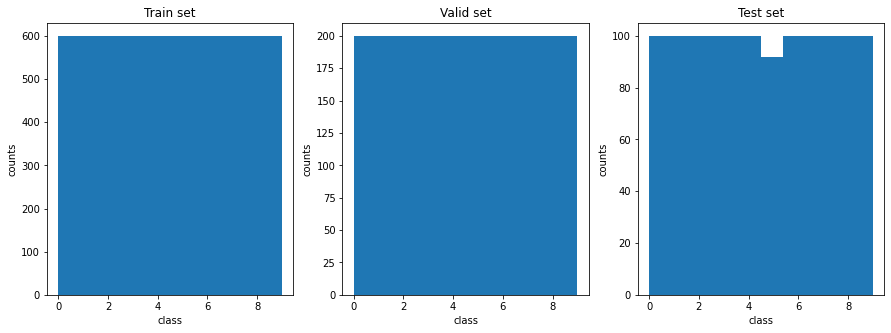

In [18]:
#--- Visualizamos la distribución de clases en cada subset
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(np.sort(Y_train))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Train set')

plt.subplot(1,3,2)
plt.hist(np.sort(Y_valid))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Valid set')

plt.subplot(1,3,3)
plt.hist(np.sort(Y_test))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Test set')

plt.show()

Este dataset cuenta con un total de 900 objetos por clase (600 para entrenamiento, 200 para validación y 100 para testeo), este es un ejemplo donde las clases están balanceadas, no siempre se tendrán datos de esta forma. 

Considerando el total de datos de este dataset,~66% son datos de entrenamiento, otro ~22% de validación y un ~11% para testeo. Esto representa un buen ejemplo de cómo distribuir los datos para entrenar sus modelos.

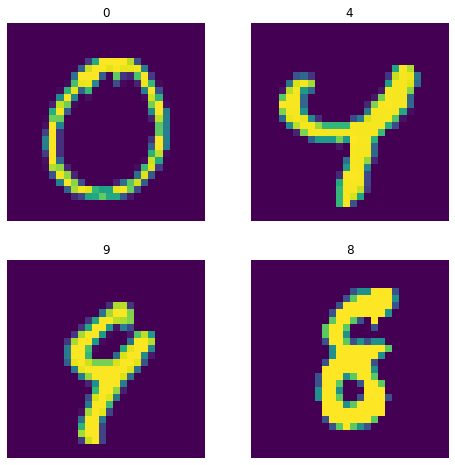

In [19]:
#-- Visualizamos los datos
fig = plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[i*15])
    plt.title(Y_test[i*15])
    plt.axis(False)
plt.show()

In [20]:
#--- Convertimos las listas de datos a tensores de torch
import torch
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [21]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [22]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
    model.train()
    
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)
  
    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())
  
    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
    
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)
  
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )
  
    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())
  
    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )
  
    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)  

Epoch [1/100], loss: 30.919437408447266. f1:0.050701761260504206 acc: 0.0754999965429306 
Epoch [2/100], loss: 19.742616653442383. f1:0.14082614820948672 acc: 0.18533332645893097 
Epoch [3/100], loss: 13.826372146606445. f1:0.2633651257077971 acc: 0.2993333339691162 
Epoch [4/100], loss: 7.605771064758301. f1:0.44059733228799347 acc: 0.44866666197776794 
Epoch [5/100], loss: 5.833649158477783. f1:0.5405449664063197 acc: 0.5408333539962769 
Epoch [6/100], loss: 5.1658735275268555. f1:0.5753836690672023 acc: 0.5821666717529297 
Epoch [7/100], loss: 4.339640140533447. f1:0.6296762019001545 acc: 0.6336666941642761 
Epoch [8/100], loss: 3.4612741470336914. f1:0.6922868230650254 acc: 0.6921666860580444 
Epoch [9/100], loss: 2.8126654624938965. f1:0.7437374632466859 acc: 0.7428333163261414 
Epoch [10/100], loss: 2.3671834468841553. f1:0.7756260182740065 acc: 0.7746666669845581 
Epoch [11/100], loss: 2.105900287628174. f1:0.7910189542291833 acc: 0.7900000214576721 
Epoch [12/100], loss: 1.9789

Epoch [94/100], loss: 0.0679478794336319. f1:0.984326434836784 acc: 0.984333336353302 
Epoch [95/100], loss: 0.06588231772184372. f1:0.9848293621756884 acc: 0.9848333597183228 
Epoch [96/100], loss: 0.06389891356229782. f1:0.9848293621756884 acc: 0.9848333597183228 
Epoch [97/100], loss: 0.06198866665363312. f1:0.9853316162415047 acc: 0.9853333234786987 
Epoch [98/100], loss: 0.0601319894194603. f1:0.9856623123746209 acc: 0.9856666922569275 
Epoch [99/100], loss: 0.05833912268280983. f1:0.9861606454167303 acc: 0.9861666560173035 
Epoch [100/100], loss: 0.056610606610774994. f1:0.9868280181674269 acc: 0.9868333339691162 


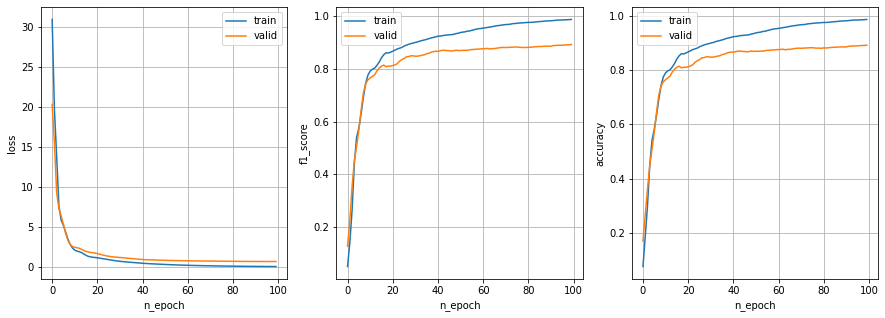

In [23]:
#-- Visualizamos las curvas de entrenamiento y validación

fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [24]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.6844581365585327, f1: 0.9028927862309217, acc: 0.9032257795333862


## Segundo caso: Cruzando train+valid

In [26]:
#--- Cargamos los datos de entrenamiento + validación en listas

N_train = len(train_files)+len(valid_files)
X_train = []
Y_train = []

for i, train_file in enumerate( train_files+valid_files ):
    Y_train.append( int(train_file.split('/')[2]) )
    X_train.append(np.array(Image.open(train_file)))

In [27]:
#--- Convetimos las listas con los datos a tensores de torch
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_train.data.size()

torch.Size([8000, 28, 28])

In [28]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)  
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [29]:
from sklearn.metrics import f1_score

n_epoch = 100

loss_train = []
f1_train = []
acc_train = []

loss_valid = []
f1_valid = []
acc_valid = []

for epoch in range(n_epoch):
    model.train()
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)
  
    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())
  
    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
    
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)
  
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )
  
    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())
  
    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)  

Epoch [1/100], loss: 40.12557601928711. f1:0.05233178616389861 acc: 0.12250000238418579 
Epoch [2/100], loss: 25.3221492767334. f1:0.10467863021962727 acc: 0.16387499868869781 
Epoch [3/100], loss: 18.826902389526367. f1:0.22701490244896982 acc: 0.2709999978542328 
Epoch [4/100], loss: 16.205312728881836. f1:0.316245252219919 acc: 0.3711250126361847 
Epoch [5/100], loss: 12.012188911437988. f1:0.39070599087968183 acc: 0.4415000081062317 
Epoch [6/100], loss: 8.860496520996094. f1:0.46320234015826867 acc: 0.4997499883174896 
Epoch [7/100], loss: 7.810752868652344. f1:0.4734515554144805 acc: 0.5007500052452087 
Epoch [8/100], loss: 6.42354154586792. f1:0.5111261375927109 acc: 0.5262500047683716 
Epoch [9/100], loss: 4.595162391662598. f1:0.5902411285340018 acc: 0.5957499742507935 
Epoch [10/100], loss: 3.35360050201416. f1:0.6552824266251427 acc: 0.6576250195503235 
Epoch [11/100], loss: 2.8441474437713623. f1:0.6836993816719077 acc: 0.6880000233650208 
Epoch [12/100], loss: 2.5979495048

Epoch [95/100], loss: 0.19400829076766968. f1:0.9441381267232346 acc: 0.9441249966621399 
Epoch [96/100], loss: 0.1912970244884491. f1:0.9450144370775805 acc: 0.9449999928474426 
Epoch [97/100], loss: 0.1886429637670517. f1:0.9457637935055321 acc: 0.9457499980926514 
Epoch [98/100], loss: 0.18604180216789246. f1:0.9466357568265389 acc: 0.9466249942779541 
Epoch [99/100], loss: 0.18349047005176544. f1:0.9480118310263939 acc: 0.9480000138282776 
Epoch [100/100], loss: 0.18098513782024384. f1:0.9485064356953933 acc: 0.9484999775886536 


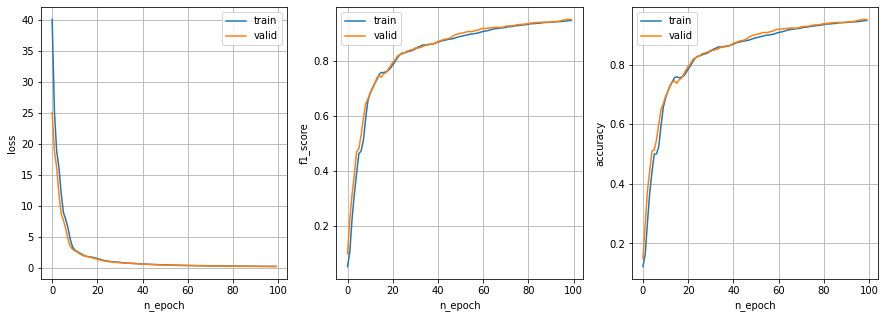

In [30]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_tr_vd.png', bbox_inches='tight')
plt.show()

In [31]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.4378843307495117, f1: 0.8946415696873059, acc: 0.8951612710952759


## Tercer caso: Cruzando train+test

In [33]:
#--- Cargamos los datos de entrenamiento + testeo en listas

N_train = len(train_files)+len(test_files)
X_train = []
Y_train = []

for i, train_file in enumerate( train_files+test_files):
    Y_train.append( int(train_file.split('/')[2]) )
    X_train.append(np.array(Image.open(train_file)))

In [34]:
#--- Convetimos las listas con los datos a tensores de torch
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_train.data.size()

torch.Size([6992, 28, 28])

In [36]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [37]:
from sklearn.metrics import f1_score

n_epoch = 100

loss_train = []
f1_train = []
acc_train = []

loss_valid = []
f1_valid = []
acc_valid = []

for epoch in range(n_epoch):
    model.train()
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)
  
    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())
  
    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
    
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)
  
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
    print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )
  
    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())
  
    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )
  
    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)  

Epoch [1/100], loss: 39.99376678466797. f1:0.04159260593085333 acc: 0.09010297805070877 
Epoch [2/100], loss: 22.661930084228516. f1:0.1125242651261444 acc: 0.1421624720096588 
Epoch [3/100], loss: 17.384052276611328. f1:0.20232885958691252 acc: 0.21553203463554382 
Epoch [4/100], loss: 14.446755409240723. f1:0.30830791384433015 acc: 0.3391018211841583 
Epoch [5/100], loss: 12.42889404296875. f1:0.3914235116009217 acc: 0.42620137333869934 
Epoch [6/100], loss: 9.553619384765625. f1:0.4973301510857978 acc: 0.5251716375350952 
Epoch [7/100], loss: 6.941837310791016. f1:0.5813924306336931 acc: 0.6085526347160339 
Epoch [8/100], loss: 5.079674243927002. f1:0.6395300203627693 acc: 0.6578947305679321 
Epoch [9/100], loss: 3.789158582687378. f1:0.7016950039336833 acc: 0.7052345275878906 
Epoch [10/100], loss: 2.9706783294677734. f1:0.7426922300067702 acc: 0.7422769069671631 
Epoch [11/100], loss: 2.5985286235809326. f1:0.7603707340990544 acc: 0.7615846395492554 
Epoch [12/100], loss: 2.549120

Epoch [96/100], loss: 0.132498100399971. f1:0.9712343602226587 acc: 0.9712528586387634 
Epoch [97/100], loss: 0.12962472438812256. f1:0.9720969843057908 acc: 0.9721109867095947 
Epoch [98/100], loss: 0.1268354207277298. f1:0.9730953269852052 acc: 0.9731121063232422 
Epoch [99/100], loss: 0.12413709610700607. f1:0.9733792962958331 acc: 0.9733981490135193 
Epoch [100/100], loss: 0.12152262032032013. f1:0.9733813018633736 acc: 0.9733981490135193 


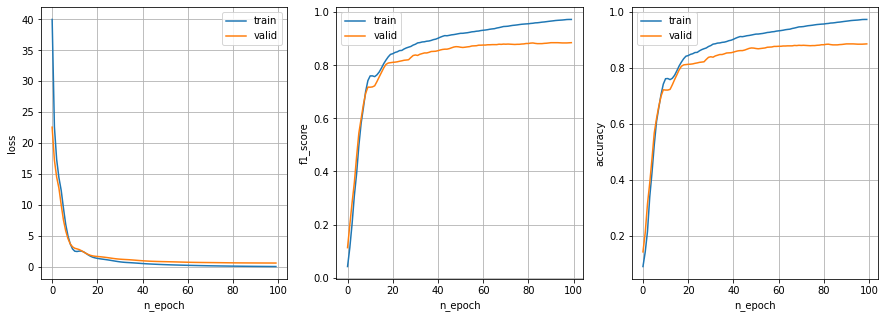

In [38]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_tr_ts.png', bbox_inches='tight')
plt.show()

In [39]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.08728495240211487, f1: 0.9797215161873043, acc: 0.9798387289047241
